In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import os
from pathlib import Path
sns.set(rc={'figure.figsize':(30,15)})

In [49]:

titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [51]:
y = titanic_data['Survived']

In [52]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [53]:
X = X.fillna({'Age' : X.Age.median()})

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4346293927935943, 0.975, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Negative'),
 Text(0.16258896797153025, 0.925, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]\nclass = Positive'),
 Text(0.060498220640569395, 0.875, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]\nclass = Positive'),
 Text(0.046263345195729534, 0.825, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]\nclass = Positive'),
 Text(0.03914590747330961, 0.775, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]\nclass = Positive'),
 Text(0.03202846975088968, 0.725, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Positive'),
 Text(0.046263345195729534, 0.725, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]\nclass = Positive'),
 Text(0.028469750889679714, 0.675, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]\nclass = Positive'),
 Text(0.014234875444839857, 0.625, 'Fare <= 13.75\nentropy = 0.5

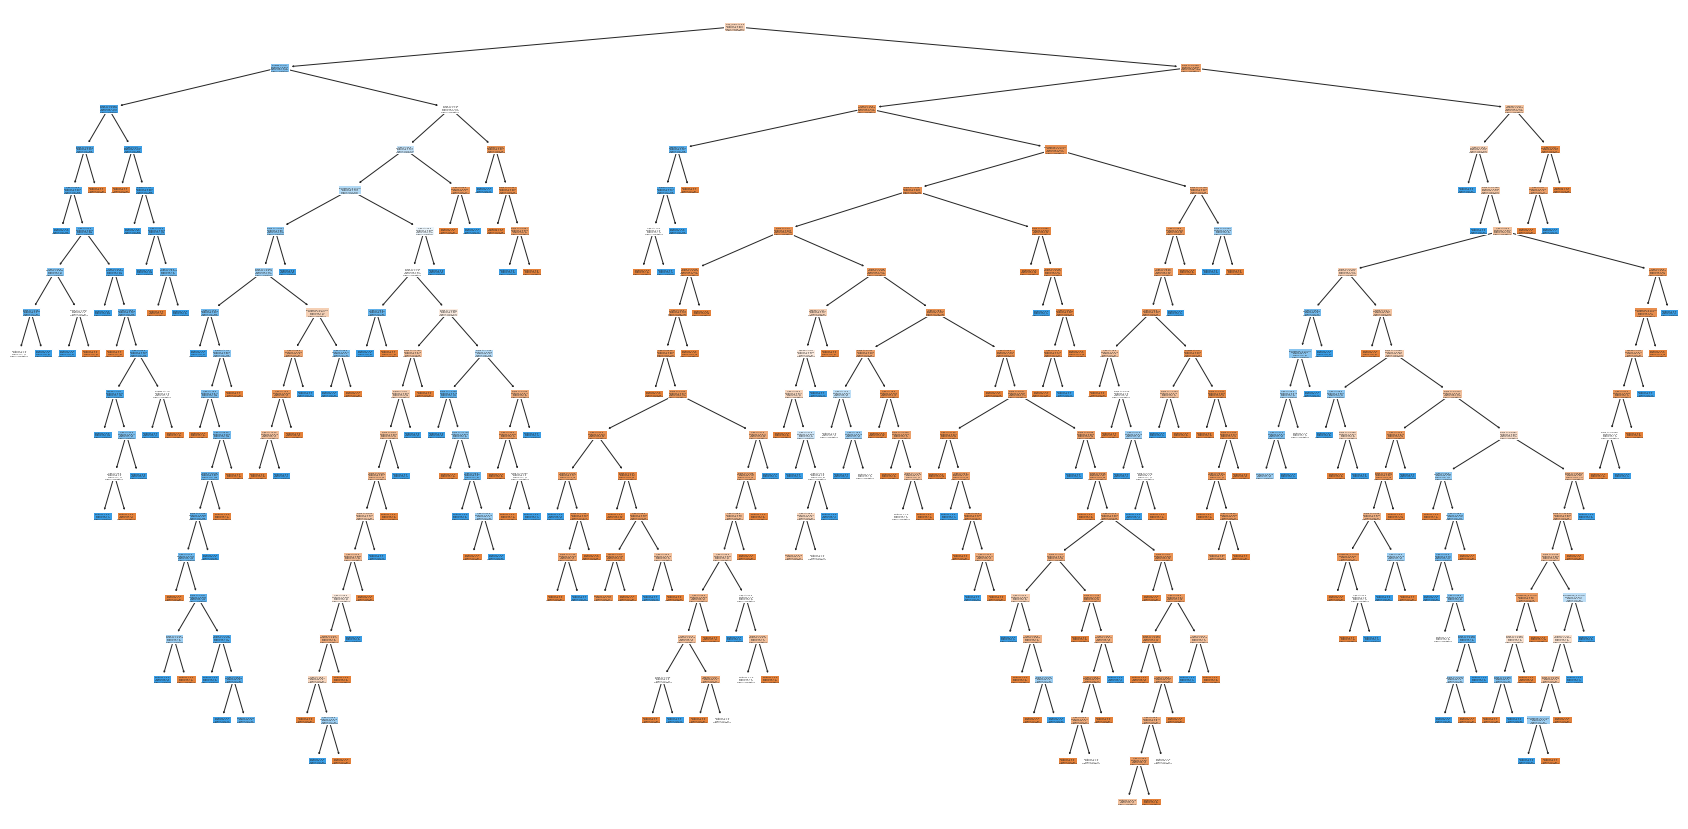

In [30]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [32]:
clf.score(X, y)

0.9797979797979798

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
clf.score(X_train, y_train)

0.9798657718120806

In [35]:
clf.score(X_test, y_test)

0.7762711864406779

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
clf.score(X_train, y_train)

0.8238255033557047

In [43]:
clf.score(X_test, y_test)

0.8203389830508474

In [55]:
# переобучение
max_depth_values = range(1,100)

In [56]:
scores_data = pd.DataFrame()

In [59]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)
    

C:\Users\Artem\AppData\Local\Temp\ipykernel_14388\966409679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_14388\966409679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_14388\966409679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_14388\966409679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_da

In [60]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.779661
0,96,0.979866,0.769492
0,97,0.979866,0.772881
0,98,0.979866,0.776271


In [61]:
scores_data_long = pd.melt(scores_data, id_vars =['max_depth'], 
                           value_vars = ['train_score', 'test_score'], 
                           var_name = 'set_type', value_name = 'score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.779661
194,96,test_score,0.769492
195,97,test_score,0.772881
196,98,test_score,0.776271


<AxesSubplot:xlabel='max_depth', ylabel='score'>

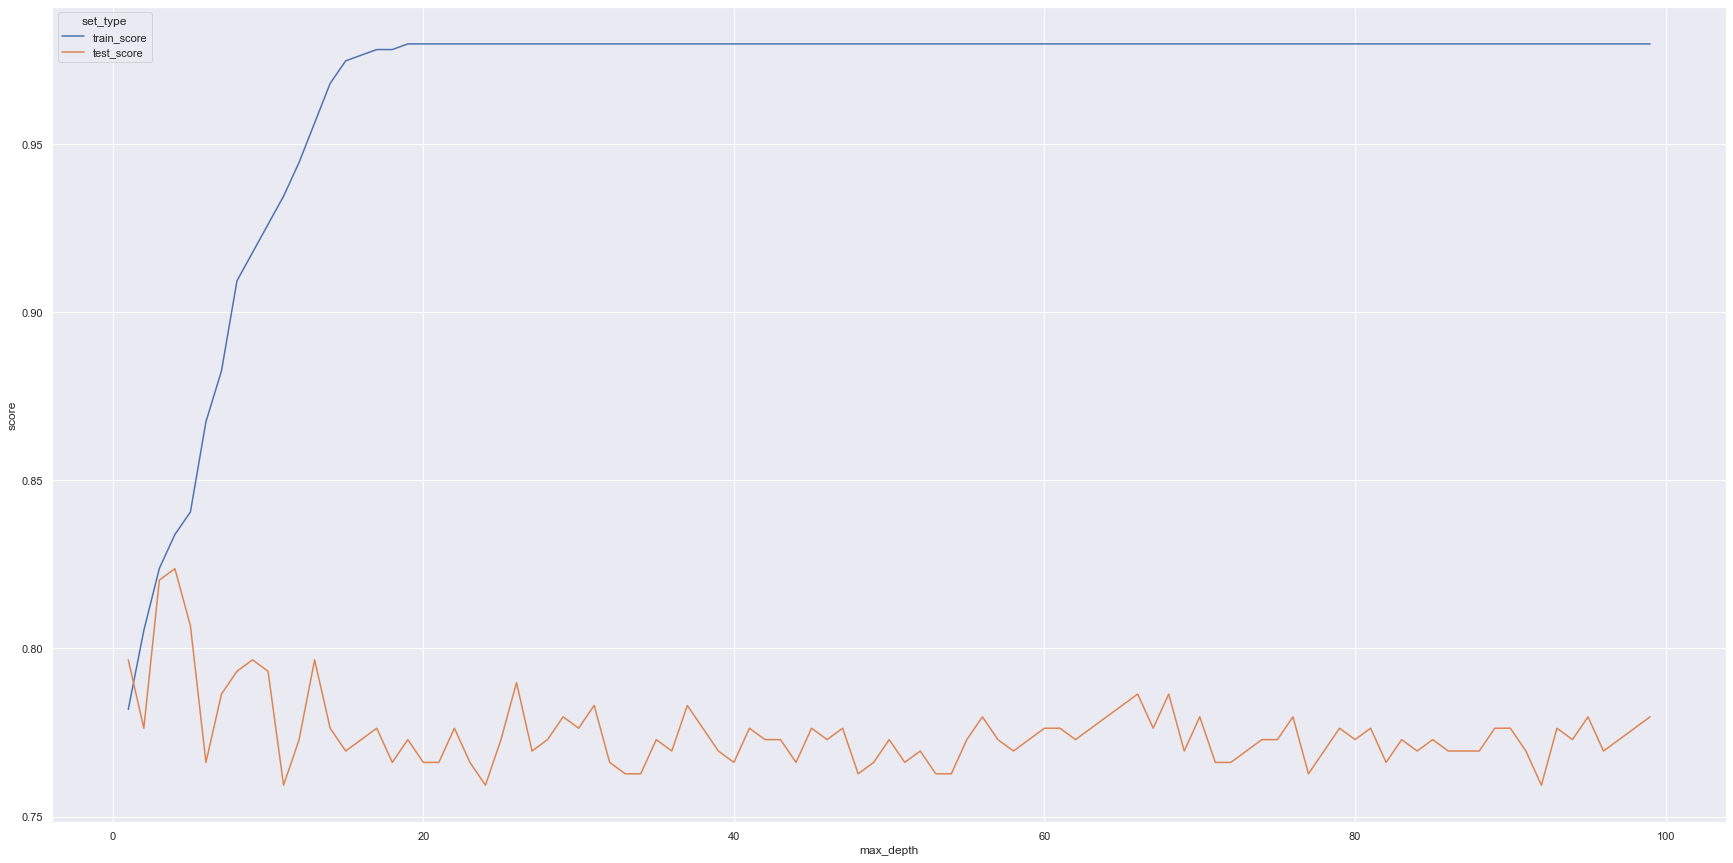

In [63]:
sns.lineplot(data = scores_data_long, x = 'max_depth', y = 'score', hue = 'set_type')

In [ ]:
# Кроссвалидация
from sklearn.model_selection import cross_val_score